In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://jacobdanovitch.blob.core.windows.net/datasets/twtc.csv')


In [ ]:
df = df.drop(['name', 'key_mlbam', 'key_fangraphs', 'age', 'year', 'primary_position', 'eta', 'Arm', 'report', 'Changeup', 'Control', 'Curveball', 'Cutter', 'Fastball', 'Field', 'Hit', 'Power', 'Run', 'Slider', 'Splitter', 'source', 'birthdate', 'mlb_played_first', 'debut_age', 'report'], axis=1)
df.head()

,label,text
0,0,PERSON is a Level 1 sex offender and wouldn't ...
1,0,The way teams value PERSON depends on whether ...
2,-1,PERSON PERSON was the headliner in the three-p...
3,-1,PERSON made headlines for all the wrong reason...
4,1,"The ORGANIZATION have acquired PERSON twice, ..."


In [ ]:
df = df.drop(df[df['label'] == -1].index)

In [ ]:
dfpos = df[df['label'] == 1]
dfneg = df[df['label'] == 0]


In [ ]:
from collections import Counter
countpos = Counter(dfpos["text"].tolist())
countneg = Counter(dfneg["text"].tolist())

In [ ]:
print(dict(list(countpos.items())[:3]))


{" The ORGANIZATION have acquired PERSON twice, first when they drafted him in 2010 and then again in March 2013 in the ORGANIZATION deal. In between, PERSON was part of the package they sent to the A's for PERSON. After a disappointing year with the A's, PERSON broke out in his return to the ORGANIZATION, reaching Double-A Harrisburg and pitching in the 2013 ORGANIZATION.  PERSON relies on his fastball, which sits in the mid-90s and reaches 98 mph. He commands the pitch well and isn't afraid to come after hitters with it. Though both his changeup and curveball aren't as advanced as his fastball, both have the potential to be Major League-average offerings.  If PERSON can hone his offspeed pitches, he has the potential to be the latest homegrown member of the ORGANIZATION rotation.": 1, "Signed for an above-slot $2 million as a ORGANIZATION fourth-round pick in 2010, PERSON was shipped to the ORGANIZATION as part of the ORGANIZATION trade after the 2011 season, only to return to GPE in

In [ ]:
posstr = ' '.join(dfpos["text"].tolist())
negstr = ' '.join(dfneg["text"].tolist())

In [ ]:
pos_cnt = Counter(posstr.split()).most_common()
neg_cnt = Counter(negstr.split()).most_common()

In [ ]:
pos_cnt_dict = dict(pos_cnt)
neg_cnt_dict = dict(neg_cnt)

In [ ]:
for key, value in pos_cnt_dict.items():
  pos_cnt_dict[key] = value/len(pos_cnt_dict)

In [ ]:
for key, value in neg_cnt_dict.items():
  neg_cnt_dict[key] = value/len(neg_cnt_dict)

In [ ]:
pos_cnt = list(pos_cnt_dict.items())
neg_cnt = list(neg_cnt_dict.items())

In [ ]:
pos_cnt = pos_cnt[50:150]
neg_cnt = neg_cnt[50:150]

In [ ]:
print(len(pos_cnt))

100


In [ ]:
print(pos_cnt, '\n' ,neg_cnt)

[('well', 0.049155844155844154), ('A', 0.04798701298701299), ('though', 0.047402597402597405), ('into', 0.04707792207792208), ('also', 0.04701298701298701), ('plus', 0.04597402597402597), ('had', 0.045909090909090906), ('season', 0.04564935064935065), ('bat', 0.04512987012987013), ('hit', 0.04435064935064935), ('still', 0.04357142857142857), ('PERSON,', 0.04285714285714286), ('one', 0.0425974025974026), ('made', 0.042272727272727274), ('second', 0.04220779220779221), ('two', 0.04214285714285714), ('best', 0.04194805194805195), ('who', 0.041623376623376625), ('ball', 0.04155844155844156), ('pro', 0.040324675324675326), ("He's", 0.039935064935064934), ('changeup', 0.0398051948051948), ('by', 0.03850649350649351), ('after', 0.03837662337662338), ('speed', 0.03831168831168831), ('solid', 0.0374025974025974), ('last', 0.037337662337662336), ('mph', 0.037337662337662336), ('should', 0.03701298701298701), ('which', 0.03675324675324675), ('better', 0.03675324675324675), ('this', 0.036298701298

In [ ]:
pos_labels = []
neg_labels = []
labels = []
x = []
y = []
for i in range(50):
  labels.append(pos_cnt[i][0])
  x.append(pos_cnt[i][1])
  y.append(neg_cnt_dict[pos_cnt[i][0]])

for i in range(50):
  labels.append(neg_cnt[i][0])
  x.append(pos_cnt_dict[neg_cnt[i][0]])
  y.append(neg_cnt[i][1])

In [ ]:
print(len(x))
print(len(y))

100
100


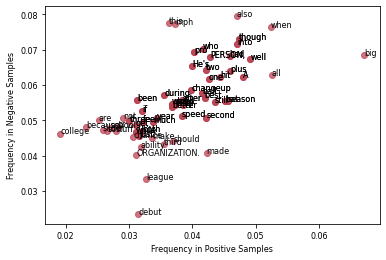

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', size=8)

plt.scatter(x, y, c ='#B83A4B', alpha=0.7)
plt.xlabel("Frequency in Positive Samples")
plt.ylabel("Frequency in Negative Samples")

for i, txt in enumerate(labels):
    plt.annotate(txt, (x[i], y[i]))

plt.savefig('scatterplot2.png', dpi=5000)


ROC

In [ ]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()